In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data=pd.read_csv("Customer-Churn.csv")
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
477,4431-EDMIQ,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,75.70,554.05,No
5121,4903-CNOZC,Male,0,No,No,29,Yes,Yes,DSL,No,...,Yes,No,No,Yes,One year,No,Credit card (automatic),70.90,1964.6,No
875,3050-GBUSH,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),34.80,113.95,No
1198,5542-NKVRU,Female,0,No,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.75,844.45,No
5693,5327-XOKKY,Male,1,Yes,No,72,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.45,5329,No
3105,4429-WYGFR,Male,0,No,No,26,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),49.15,1237.3,No
2812,3763-GCZHZ,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,104.05,6890,Yes
1698,1298-PHBTI,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Two year,Yes,Electronic check,84.80,6152.4,No
1705,4918-FYJNT,Female,1,Yes,No,55,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.45,5044.8,No


In [3]:
# Data Exploration

data.drop('customerID',axis='columns',inplace=True) # Inplace=True will update the data after dropping the column

In [4]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
# pd.to_numeric(data.TotalCharges) # to_Numeric will convert the objects to numeric values

In [8]:
pd.to_numeric(data.TotalCharges,errors='coerce') # errors='coerce' will ignore the null value errors

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
data.shape

(7043, 20)

In [12]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [13]:
data.iloc[488]  # iloc is an array indexing

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [14]:
data1=data[data.TotalCharges!=' '] # The null data will not be stored in the data1
data1.shape

(7032, 20)

In [15]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
data1.TotalCharges=pd.to_numeric(data1.TotalCharges)

<ipython-input-16-a59f8766e9c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges=pd.to_numeric(data1.TotalCharges)


In [17]:
data1.TotalCharges.dtypes

dtype('float64')

In [18]:
tenure_churn_no=data1[data1.Churn=='No'].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [19]:
print(len(tenure_churn_no))

5163


In [20]:
tenure_churn_yes=data1[data1.Churn=='Yes'].tenure
tenure_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [21]:
print(len(tenure_churn_yes))

1869


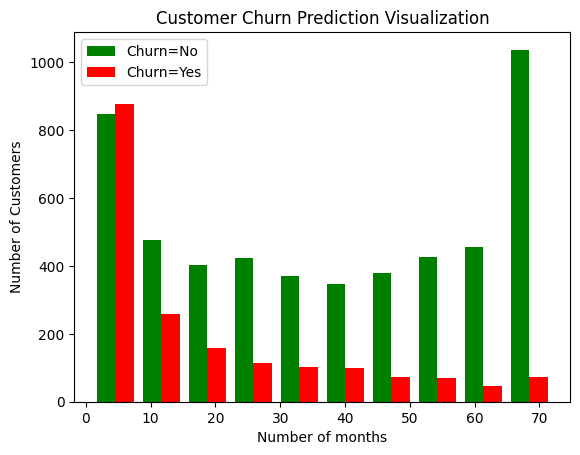

In [22]:
# Churn no means customers are not leaving
# Churn yes means customers are leaving

plt.ylabel("Number of Customers")
plt.xlabel("Number of months")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()

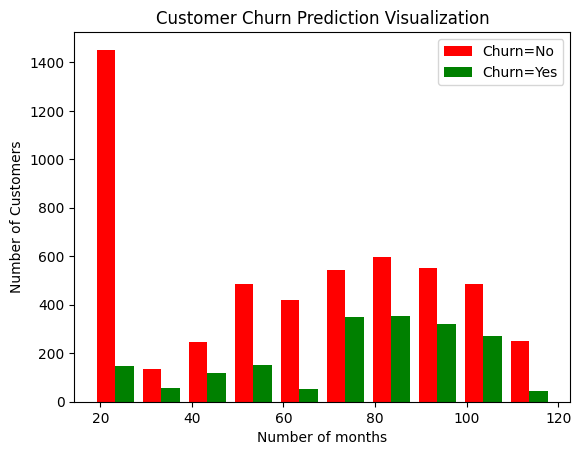

In [23]:
moch_churn_no=data1[data1.Churn=='No'].MonthlyCharges
moch_churn_yes=data1[data1.Churn=='Yes'].MonthlyCharges

plt.ylabel("Number of Customers")
plt.xlabel("Number of months")
plt.title("Customer Churn Prediction Visualization")
plt.hist([moch_churn_no,moch_churn_yes],color=['red','green'],label=['Churn=No','Churn=Yes'])
plt.legend()

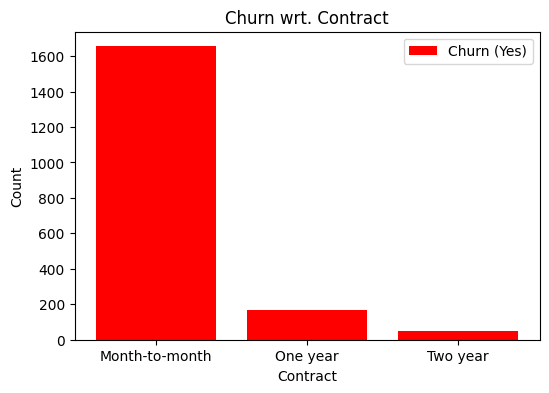

In [24]:
data_churn_yes = data[data["Churn"] == "Yes"]
data_churn_no = data[data["Churn"] == "No"]
plt.figure(figsize=(6, 4))

plt.bar(data_churn_yes["Contract"].value_counts().index, data_churn_yes["Contract"].value_counts().values, label="Churn (Yes)", color="red")

plt.title("Churn wrt. Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.legend()
plt.show()

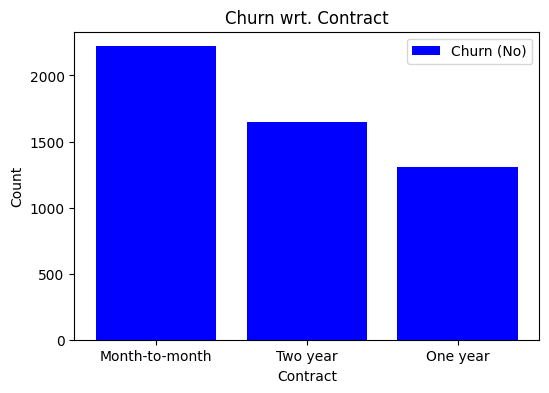

In [25]:
data_churn_no = data[data["Churn"] == "No"]
plt.figure(figsize=(6, 4))

plt.bar(data_churn_no["Contract"].value_counts().index, data_churn_no["Contract"].value_counts().values, label="Churn (No)", color="blue")

plt.title("Churn wrt. Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.legend()
plt.show()

In [26]:
def print_unique_col_values():
    for col in data1:
      if data1[col].dtypes=='object':
         print(f'{col}:{data1[col].unique()}')
print_unique_col_values()

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
data1.replace('No internet service','No',inplace=True)
data1.replace('No phone service','No',inplace=True)

<ipython-input-27-583376ecac3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service','No',inplace=True)
<ipython-input-27-583376ecac3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service','No',inplace=True)


In [28]:
print_unique_col_values()

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [29]:
print(data1.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [30]:
yes_no_col=['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_col:
  data1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-30-da4ac5c99b30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].replace({'Yes':1,'No':0},inplace=True)


In [31]:
for col in data1:
  print(f'{col}:{data1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [32]:
data1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-32-991b4b0618e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [33]:
data1['gender'].unique()

array([1, 0])

In [34]:
data1=pd.get_dummies(data=data1,columns=['InternetService']) # One hot encoding

In [35]:
data1=pd.get_dummies(data=data1,columns=["PaymentMethod"])

In [36]:
data1=pd.get_dummies(data=data1,columns=["Contract"])

In [37]:
data1.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
6276,1,0,1,1,15,1,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False
4974,0,0,0,0,3,0,0,0,1,0,...,True,False,False,False,False,False,True,True,False,False
2051,1,0,1,1,69,1,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True
6676,1,0,1,1,41,1,1,1,1,0,...,False,True,False,True,False,False,False,True,False,False
6225,0,0,1,1,72,1,1,1,1,1,...,False,True,False,False,True,False,False,False,False,True
1870,0,0,0,0,1,1,0,0,0,0,...,True,False,False,False,False,False,True,True,False,False


In [38]:
data1.shape

(7032, 27)

In [39]:
data1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [40]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data1[col_to_scale]=scaler.fit_transform(data1[col_to_scale])

In [41]:
data1.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1615,1,0,1,0,0.676056,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
1140,1,0,0,1,0.169014,1,1,1,1,1,...,True,False,False,False,True,False,False,False,False,True
5810,1,0,1,1,0.225352,1,1,0,0,0,...,False,True,False,False,False,True,False,True,False,False
3283,1,0,1,1,0.957746,1,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False
3567,1,0,1,1,0.183099,1,0,0,1,0,...,False,True,False,False,True,False,False,True,False,False
1379,1,0,0,0,0.971831,0,0,1,1,1,...,True,False,False,True,False,False,False,False,False,True


In [42]:
for col in data1:
  print(f'{col}:{data1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [43]:
X=data1.drop('Churn',axis='columns')
y=data1['Churn']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

In [45]:
X_train.shape

(4922, 26)

In [46]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
581,1,0,0,0,0.000000,1,0,1,0,0,...,False,True,False,False,False,False,True,True,False,False
5756,1,0,0,0,0.732394,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
6432,0,0,1,0,0.478873,1,0,1,1,1,...,True,False,False,False,False,False,True,True,False,False
5488,0,1,1,0,0.619718,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False
6112,1,1,1,1,0.915493,1,1,0,1,1,...,False,True,False,False,False,True,False,False,True,False
4198,1,0,1,1,0.718310,1,1,0,0,0,...,False,False,True,False,False,False,True,False,False,True
5625,1,0,0,1,0.295775,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False
1702,1,0,1,0,0.281690,1,1,1,0,1,...,False,True,False,True,False,False,False,True,False,False
1416,1,0,1,1,0.802817,0,0,0,0,1,...,True,False,False,False,True,False,False,False,False,True
5499,0,1,0,0,0.197183,1,0,0,0,0,...,False,True,False,False,False,True,False,True,False,False


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=6)

model= SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1037
           1       0.65      0.59      0.62       370

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.80      0.81      0.81      1407



In [49]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

Text(95.72222222222221, 0.5, 'Truth')

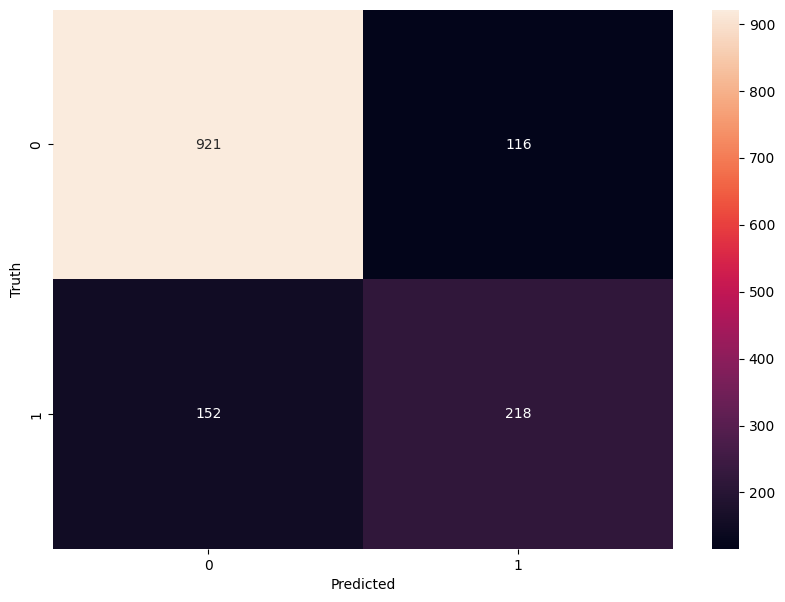

In [50]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    # keras.layers.Dense(19,activation="relu"),
    # keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6024 - accuracy: 0.6697
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7872
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7888
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7954
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7972
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8002
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8014
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.7995
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8011
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accura

In [52]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [53]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8117


[0.4106622338294983, 0.8116559982299805]

In [54]:
yp=model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 1ms/step


array([[0.02849432],
       [0.00744468],
       [0.0045908 ],
       [0.00177214],
       [0.57204086],
       [0.01127067],
       [0.73243356],
       [0.5933895 ],
       [0.02306861],
       [0.55342096]], dtype=float32)

In [55]:
y_test[:10]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
Name: Churn, dtype: int64

In [56]:
y_pred=[]
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [57]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 1]

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1037
           1       0.67      0.56      0.61       370

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



Text(95.72222222222221, 0.5, 'Truth')

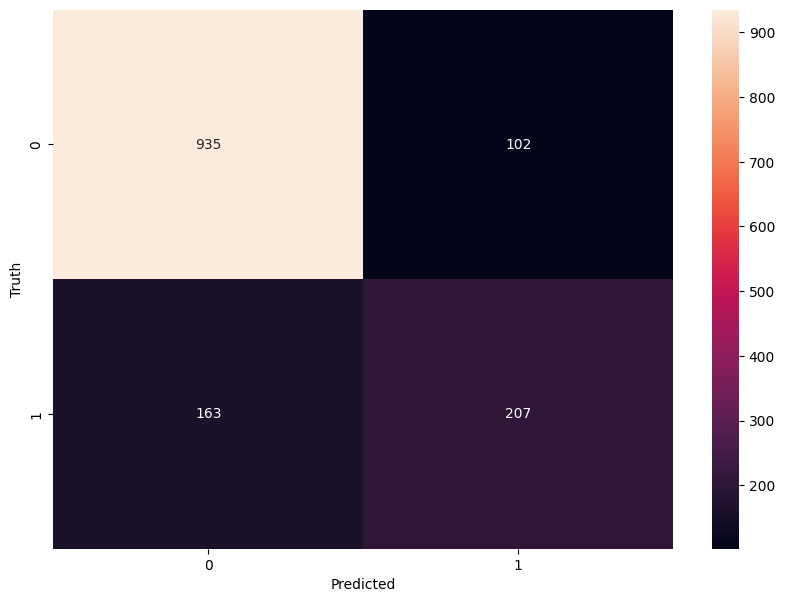

In [59]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
import pickle

In [72]:
filename='model.sav'

In [73]:
pickle.dump(model,open(filename,'wb'))

In [74]:
load_model=pickle.load(open(filename,'rb'))

In [77]:
load_model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8117


[0.4106622338294983, 0.8116559982299805]